# PROJECT: Web Scraping - Immobiliare.it

The aim of this project is to get an extraction of real estate data from the website Immobiliare.it (https://www.immobiliare.it/) with a python script. Also, after a process of data cleaning and exploration, to make a ML model to predict the sale/rent appartment price.

-----

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

## DATA SCRAPING

### DATA EXTRACTION

To extract the real estate data from the website, I made a script with the following functions: 
1) a first function (scraping_areas_immobiliare) that returns a list with all city area names;
2) a second function (scraping_immobiliare) that returns a dataframe with all real estate data based on one city area;
3) a third function (city_dataframe) that, using the previous ones, return a dataframe with all real estate data based on all city areas.

So, after I imported the script above, I used the third function with the following parameters: the city, the ads kind (rent/sale) and the apartment type (house/room)

In [2]:
# import the functions contained in the script
from functions import scraping

In [3]:
# make a df with the imported functions
df_immobiliare_raw = scraping.city_dataframe('napoli', 'vendita', 'case')
df_immobiliare_raw

,title,city,area,price,surface,floor,rooms,bathrooms
0,"Appartamento via Marechiaro 24, Marechiaro, Na...",napoli,Marechiaro,€ 880.000,192m²,T,5,2
1,"Villa unifamiliare via Marechiaro, Marechiaro,...",napoli,Marechiaro,None,250m²,None,5+,3+
2,"Attico discesa Gaiola 7, Marechiaro, Napoli",napoli,Marechiaro,€ 1.900.000,230m²,2,5+,3
3,"Appartamento viale Virgilio, Marechiaro, Napoli",napoli,Marechiaro,None,450m²,None,5+,3+
4,"Bilocale via Alfano a Marechiaro, Marechiaro, ...",napoli,Marechiaro,€ 210.000,45m²,T,2,1
...,...,...,...,...,...,...,...,...
3895,"Attico via Giosuè Carducci 1, Chiaia, Napoli",napoli,Chiaia,€ 1.000.000,75m²,9,5+,3+
3896,"Trilocale via Ferdinando Palasciano 11, Chiaia...",napoli,Chiaia,€ 360.000,100m²,R,3,2
3897,"Quadrilocale corso Vittorio Emanuele 608, Chia...",napoli,Chiaia,€ 1.200,95m²,5,4,3
3898,Appartamento piazzetta San Carlo alle Mortelle...,napoli,Chiaia,€ 590.000,160m²,2,5+,1


## DATA CLEANING & DATA EXPLORATION

### DATA CLEANING

In [4]:
df_immobiliare_clean = df_immobiliare_raw.copy()

In [5]:
df_immobiliare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      3900 non-null   object
 1   city       3900 non-null   object
 2   area       3900 non-null   object
 3   price      3782 non-null   object
 4   surface    3897 non-null   object
 5   floor      3621 non-null   object
 6   rooms      3836 non-null   object
 7   bathrooms  3474 non-null   object
dtypes: object(8)
memory usage: 243.9+ KB


In [6]:
# check unique values in the last three columns
for i in df_immobiliare_clean.columns[-3:]:
    print(i, " :", df_immobiliare_clean[i].unique())

floor  : ['T' None '2' 'S' 'R' '1' '3' '5 - 6' '6' '4' '5' '7' '8' '10' '9' '3 - 4'
 'S2' '14' '1 - 2' '4 - 5' 'S3' '13' '11+' '11' '1 - 3' 'S4' '2 - 3']
rooms  : ['5' '5+' '2' '4' '3' '1' None]
bathrooms  : ['2' '3+' '3' '1' None]


In [7]:
# check unique values in the price column
print("price :", df_immobiliare_clean.price.unique())

price : ['€ 880.000' None '€ 1.900.000' '€ 210.000' '€ 1.050.000' '€ 650.000'
 '€ 350.000' '€ 690.000' '€ 290.000' '€ 780.000' '€ 380.000' '€ 1.380.000'
 '€ 1.490.000' '€ 1.150.000' '€ 89.000' '€ 2.200.000' '€ 465.000'
 '€ 1.650.000' '€ 795.000' '€ 3.100.000' '€ 1.250.000' '€ 180.000'
 '€ 165.000' '€ 750.000' '€ 1.200.000' '€ 1.500.000' '€ 1.080.000'
 'da € 1.050.000,00' '€ 1.199.000' '€ 2.300.000' '€ 1.000.000'
 '€ 2.000.000' '€ 2.600.000' '€ 1.700.000' '€ 2.700.000' '€ 495.000'
 '€ 240.000' '€ 84.000€ 89.000(-5,6%)' '€ 1.007.000' '€ 120.000'
 '€ 920.000' '€ 396.000' '€ 142.000€ 150.000(-5,3%)' '€ 319.000'
 '€ 430.000' '€ 480.000' '€ 310.000' '€ 250.000' '€ 320.000' '€ 130.000'
 '€ 720.000' '€ 98.000' '€ 580.000' '€ 395.000' '€ 600.000' '€ 280.000'
 '€ 190.000' '€ 225.000€ 245.000(-8,2%)' '€ 325.000'
 '€ 650.000€ 780.000(-16,7%)' '€ 739.600' '€ 359.000'
 '€ 270.000€ 285.000(-5,3%)' '€ 50.000' '€ 590.000' 'da € 105.000,00'
 '€ 425.000' '€ 85.000' '€ 355.000' '€ 90.000' '€ 70.000' '€ 22

In [8]:
# check the rows where the surface column has None value
df_immobiliare_clean[df_immobiliare_clean['surface'].isnull()]

,title,city,area,price,surface,floor,rooms,bathrooms
1849,"Bilocale via umbria, Secondigliano, Napoli",napoli,Secondigliano,€ 135.000,None,2,2,None
1868,"Bilocale da ristrutturare, quinto piano, Secon...",napoli,Secondigliano,€ 116.000,None,None,2,1
2091,"Appartamento terzo piano, Ponticelli, Napoli",napoli,Ponticelli,€ 159.000,None,3,5+,None


From the above it emerges that it is necessary: 

1) To clean data in surface column and price column:
    - to delete symbols (€, m²), blanks, periods (.);
    - to keep only the discounted price, where there is a discount;
    - to replace the auction prices with the average price in the area;
2) To replace the None values in surface column and price column with the area average;
3) To change the data type of surface column and price column;
4) To clean data in surface, bathrooms and rooms columns:
   - to delete rows whare there are None values;
   - to change the columns data type.

In [9]:
# make a function to replace element into a column
def clean_function(col, find, replace): 
    return col.str.replace(find, replace, regex=False)

#### 1.To clean data in surface column and price column

In [10]:
# delete symbols '€' and 'm²' in surface column and price column
df_immobiliare_clean['price'] = clean_function(df_immobiliare_clean['price'],'€', '')
df_immobiliare_clean['surface'] = clean_function(df_immobiliare_clean['surface'],'m²', '')

# rename the columns adding the unit of measure
df_immobiliare_clean = df_immobiliare_clean.rename(columns={'price':'price(€)','surface':'surface(m²)'})

In [11]:
# make a list with auction prices row index
index_auction_prices = df_immobiliare_clean[df_immobiliare_clean['price(€)'].str.contains('da')==True].index

# replace auction price with None value to replace them with the average later
df_immobiliare_clean.loc[index_auction_prices, 'price(€)'] = None

In [12]:
# make a list with discounted prices row index
index_discounted_prices = df_immobiliare_clean[df_immobiliare_clean['price(€)'].str.contains('%')==True].index

# replace the discounted prices with the only discounted price
for i in list(range(0,len(index_discounted_prices))):
    df_immobiliare_clean.loc[index_discounted_prices[i], 'price(€)'] = df_immobiliare_clean.loc[index_discounted_prices[i], 'price(€)'].split()[0]

In [13]:
# delete periods '.' in the price column
df_immobiliare_clean['price(€)'] = clean_function(df_immobiliare_clean['price(€)'],'.', '')

# delete periods '.' in the surface column
df_immobiliare_clean['surface(m²)'] = clean_function(df_immobiliare_clean['surface(m²)'],'.', '')


#### 2.To replace the None values in surface column and price column with the area average

In [14]:
# change the data type of the not null values in price column with 'int'
df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['price(€)'].notnull()]['price(€)'].index, 'price(€)'] = df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['price(€)'].notnull()]['price(€)'].index, 'price(€)'].astype('int')

# replace the None values in price column with the area average
areas_unique = df_immobiliare_clean.area.unique()

for c in areas_unique:
    m = df_immobiliare_clean[(df_immobiliare_clean['area']==c) & (df_immobiliare_clean['price(€)'].notnull())]['price(€)'].mean()
    i = df_immobiliare_clean[(df_immobiliare_clean['area']==c) & (df_immobiliare_clean['price(€)'].isnull())]['price(€)'].index
    df_immobiliare_clean.loc[i,'price(€)'] = df_immobiliare_clean.loc[i,'price(€)'].fillna(m)

# check there aren't null value
df_immobiliare_clean[df_immobiliare_clean['price(€)'].isnull()]


,title,city,area,price(€),surface(m²),floor,rooms,bathrooms


In [15]:
# change the data type of the not null values in surface column with 'int'
df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['surface(m²)'].notnull()]['surface(m²)'].index, 'surface(m²)'] = df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['surface(m²)'].notnull()]['surface(m²)'].index, 'surface(m²)'].astype('int')

# replace the None values in surface column with the area average
for c in areas_unique:
    m = df_immobiliare_clean[(df_immobiliare_clean['area']==c) & (df_immobiliare_clean['surface(m²)'].notnull())]['surface(m²)'].mean()
    i = df_immobiliare_clean[(df_immobiliare_clean['area']==c) & (df_immobiliare_clean['surface(m²)'].isnull())]['surface(m²)'].index
    df_immobiliare_clean.loc[i,'surface(m²)'] = df_immobiliare_clean.loc[i,'surface(m²)'].fillna(m)

# check there aren't null value
df_immobiliare_clean[df_immobiliare_clean['surface(m²)'].isnull()]

,title,city,area,price(€),surface(m²),floor,rooms,bathrooms


#### 3.To change the data type of surface column and price column

In [16]:
df_immobiliare_clean['surface(m²)'] = df_immobiliare_clean['surface(m²)'].astype('int')
df_immobiliare_clean['price(€)'] = df_immobiliare_clean['price(€)'].astype('int')

#### 4.To clean data in surface, bathrooms and rooms columns

In [17]:
# delete rows where there is at least one null value in surface, bathrooms and rooms columns
df_immobiliare_clean = df_immobiliare_clean.dropna(subset=['floor', 'rooms', 'bathrooms'])

In [18]:
df_immobiliare_clean['bathrooms'].unique()

array(['2', '3', '1', '3+'], dtype=object)

In [19]:
# replace '3+' with '4', then convert in 'int'
df_immobiliare_clean['bathrooms'] = clean_function(df_immobiliare_clean['bathrooms'],'3+', '4')
df_immobiliare_clean['bathrooms'] = df_immobiliare_clean['bathrooms'].astype('int')

In [20]:
df_immobiliare_clean['rooms'].unique()

array(['5', '5+', '2', '4', '3', '1'], dtype=object)

In [21]:
# replace '5+' with  '6', then convert in 'int'
df_immobiliare_clean['rooms'] = clean_function(df_immobiliare_clean['rooms'],'5+', '6')
df_immobiliare_clean['rooms'] = df_immobiliare_clean['rooms'].astype('int')

In [22]:
df_immobiliare_clean['floor'].unique()

array(['T', '2', 'S', 'R', '1', '3', '5 - 6', '6', '4', '5', '7', '8',
       '10', '9', '3 - 4', 'S2', '14', '1 - 2', '4 - 5', 'S3', '13',
       '11+', '11', '1 - 3', 'S4', '2 - 3'], dtype=object)

In [23]:
# to get values of the floors representative of a mathematical scale that goes from the lowest to the highest, replace the values as follows:

# replace 'T' with '0' 
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'T', '0')
# replace 'R' with '0.1'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'R', '0.1')
# replace 'S2' with '-2'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'S2', '-2')
# replace 'S3' with '-3'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'S3', '-3')
# replace 'S4' with '-4'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'S4', '-4')
# replace 'S' with '-1'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'S', '-1')      # insert then others S
# replace '1 - 2' with '1.5'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'1 - 2', '1.5')
# replace '1 - 3' with '2'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'1 - 3', '2')
# replace '2 - 3' with '2.5'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'2 - 3', '2.5')
# replace '3 - 4' with '3.5'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'3 - 4', '3.5')
# replace '4 - 5' with '4.5'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'4 - 5', '4.5')
# replace '5 - 6' with '5.5'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'5 - 6', '5.5')
# replace '11+' with '12'
df_immobiliare_clean['floor'] = clean_function(df_immobiliare_clean['floor'],'11+', '12')
# convert in 'float'
df_immobiliare_clean['floor'] = df_immobiliare_clean['floor'].astype('float')

In [24]:
df_immobiliare_clean = df_immobiliare_clean.reset_index(drop=True)

In [25]:
df_immobiliare = df_immobiliare_clean.copy()

### DATA EXPLORATION

#### General info

In [26]:
df_immobiliare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3231 non-null   object 
 1   city         3231 non-null   object 
 2   area         3231 non-null   object 
 3   price(€)     3231 non-null   int32  
 4   surface(m²)  3231 non-null   int32  
 5   floor        3231 non-null   float64
 6   rooms        3231 non-null   int32  
 7   bathrooms    3231 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 151.6+ KB


In [27]:
df_immobiliare.describe()

,price(€),surface(m²),floor,rooms,bathrooms
count,3.231000e+03,3231.000000,3231.000000,3231.000000,3231.000000
mean,3.146667e+05,145.249149,2.393531,3.406066,1.483442
std,3.310043e+05,2118.115258,2.087095,1.274572,0.650521
min,1.200000e+03,1.000000,-4.000000,1.000000,1.000000
25%,1.400000e+05,70.000000,1.000000,3.000000,1.000000
50%,2.250000e+05,95.000000,2.000000,3.000000,1.000000
75%,3.793750e+05,125.000000,3.000000,4.000000,2.000000
max,8.500000e+06,120000.000000,14.000000,6.000000,4.000000


We note that the minimum and maximum of the surface variable appear to be anomalous

#### Price Variable

In [28]:
# ads number for area
df_immobiliare.groupby('area')['price(€)'].describe().sort_values(by="std", ascending=False)

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
Chiaia,131.0,791040.190840,963044.405039,1200.0,280000.0,500000.0,890000.0,8500000.0
Marechiaro,26.0,910346.153846,555885.523633,165000.0,401250.0,837500.0,1237250.0,1900000.0
Vomero,207.0,564266.927536,383131.540527,69000.0,350000.0,495000.0,682500.0,3000000.0
Mergellina,352.0,566798.545455,338275.110196,75000.0,360000.0,520000.0,750000.0,1350000.0
Museo,50.0,332117.520000,310551.585026,33000.0,100000.0,235000.0,502500.0,1620000.0
Centro,220.0,272904.327273,231107.336072,35000.0,122250.0,212500.0,340000.0,1600000.0
Arenella,228.0,411135.206140,183067.949697,59000.0,295000.0,390000.0,490000.0,1150000.0
Fuorigrotta,211.0,263991.478673,138528.828725,60000.0,192500.0,240000.0,296500.0,1450000.0
Traiano,48.0,214031.250000,138503.337630,80000.0,145500.0,192500.0,238500.0,950000.0


We note that in areas where real estate has a higher value, there is a strong standard deviation. The median appears to be more representative of the price value.

#### Surface variable

In [29]:
# ads number for area
df_immobiliare.groupby('area')['surface(m²)'].describe().sort_values(by="min", ascending=False)

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
Scampia,44.0,117.522727,37.789188,57.0,94.50,114.5,130.00,240.0
Marechiaro,26.0,167.615385,129.911378,45.0,81.00,135.0,205.50,675.0
Piscinola,75.0,95.533333,37.660766,40.0,70.00,90.0,112.50,250.0
Barra,82.0,92.268293,58.185113,35.0,65.00,80.0,97.75,450.0
Camaldoli,31.0,367.161290,1509.907659,35.0,70.00,90.0,116.50,8500.0
Arenella,228.0,107.276316,37.666844,30.0,80.00,105.0,131.50,220.0
Poggioreale,47.0,84.851064,30.438804,30.0,66.50,76.0,105.00,190.0
Vomero,207.0,123.207729,69.983634,30.0,84.00,110.0,147.50,536.0
Chiaiano,74.0,102.716216,53.633337,30.0,77.75,90.0,115.00,400.0


In [30]:
# check Capodichino area that seems to have an anomalous minimum and maximum

df_immobiliare[df_immobiliare['area']=='Capodichino'].sort_values(by="surface(m²)", ascending=False)

,title,city,area,price(€),surface(m²),floor,rooms,bathrooms
1383,"Trilocale Strada Comunale dei Cavoni 6, Capodi...",napoli,Capodichino,190000,120000,0.1,3,1
1289,"Attico via dello Sputnik, Capodichino, Napoli",napoli,Capodichino,330000,385,3.5,4,1
1365,"Palazzo - Edificio via della Mongolfiera, Capo...",napoli,Capodichino,185532,260,1.0,6,2
1328,"Bilocale via Nuovo Tempio 67, Capodichino, Napoli",napoli,Capodichino,145000,215,0.0,2,1
1294,"Quadrilocale via Filippo Maria Briganti 324, C...",napoli,Capodichino,164000,215,0.0,4,2
...,...,...,...,...,...,...,...,...
1337,"Bilocale via Francesco De Pinedo 15, Secondigl...",napoli,Capodichino,41900,32,0.0,2,1
1318,"Monolocale Sanda Provinciale di Caserta 177, S...",napoli,Capodichino,35000,30,0.0,1,1
1327,"Monolocale via Francesco Aggello, Capodichino,...",napoli,Capodichino,37500,30,0.0,1,1
1335,"Monolocale Strada Provinciale di Caserta, Capo...",napoli,Capodichino,25000,25,0.0,1,1


In [31]:
# check Camaldoli area that seems to have an anomalous maximum

df_immobiliare[df_immobiliare['area']=='Camaldoli'].sort_values(by="surface(m²)", ascending=False).head()

,title,city,area,price(€),surface(m²),floor,rooms,bathrooms
2398,"Palazzo - Edificio via dell'Eremo 81, Camaldol...",napoli,Camaldoli,310822,8500,1.0,6,4
2384,"Quadrilocale via Vicinale Agnolella 2, Camaldo...",napoli,Camaldoli,560000,190,1.0,4,3
2393,"Appartamento via Camaldolilli, Camaldoli, Napoli",napoli,Camaldoli,570000,190,1.0,5,3
2405,"Appartamento via Vicinale Reggente 41, Camaldo...",napoli,Camaldoli,273975,164,1.0,6,2
2404,"Appartamento via Vicinale Reggente 41, Camaldo...",napoli,Camaldoli,257250,153,0.0,6,2


We note that in the Capodino area there is a strong variance, in fact the minimum and the maximum seem to be anomalous values.
Furthermore, there seem to be some anomalous values by observing the minima (less than 3 square meters) in the areas of Capodichino, Fuorigrotta and Ponticelli.
For the Camaldoli area we notice a property that seems anomalous (an unusually low price considering the value of the 8500m² surface).

Also in this case the median seems to be more representative of the value of the surface.

#### Check and remove outliers

We observe the distribution of the price and area variables using boxplots according to the areas to identify outliers

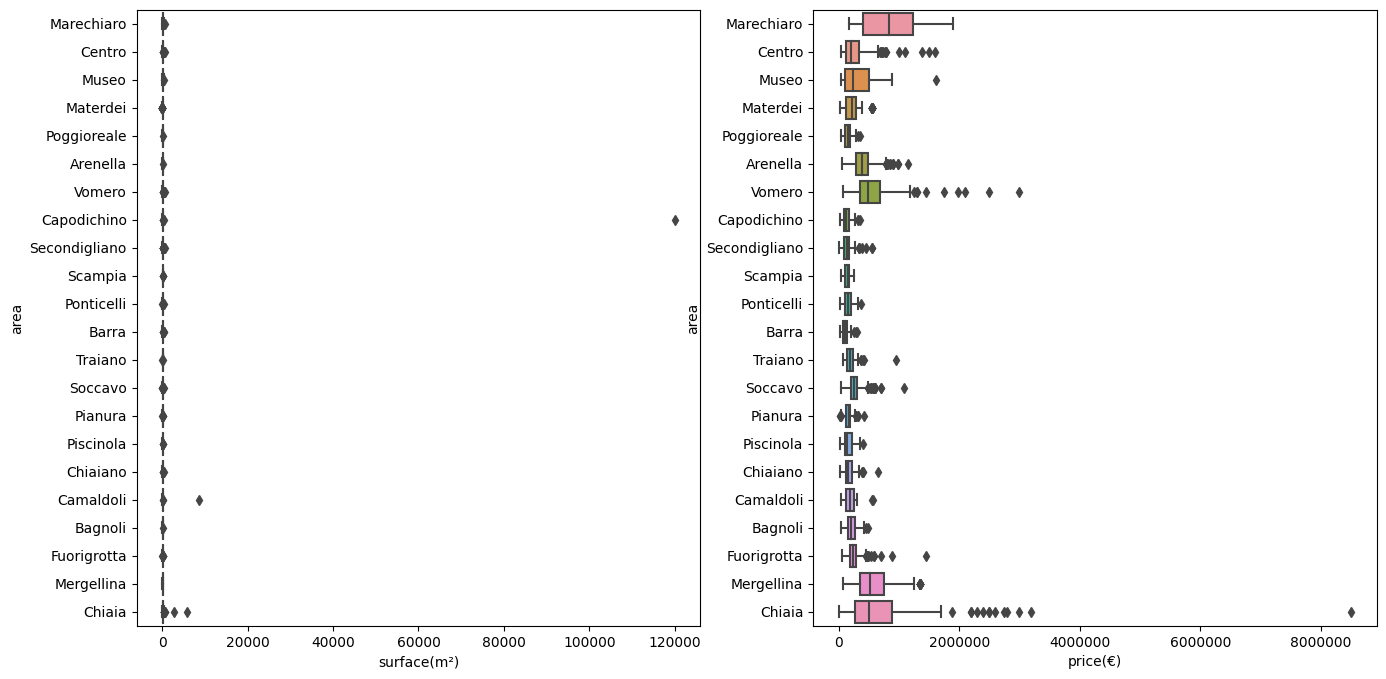

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(y='area', x='surface(m²)', data=df_immobiliare, ax=axs[0])
sns.boxplot(y='area', x='price(€)', data=df_immobiliare, ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='x')
plt.show()

Delete the anomalous values identified as follows: surface greater than 400 square meters and price greater than 3.500.000 euros.

In [33]:
df_immobiliare = df_immobiliare[df_immobiliare['price(€)']<3500000]
df_immobiliare = df_immobiliare[df_immobiliare['surface(m²)']<400]
df_immobiliare = df_immobiliare.reset_index(drop=True)

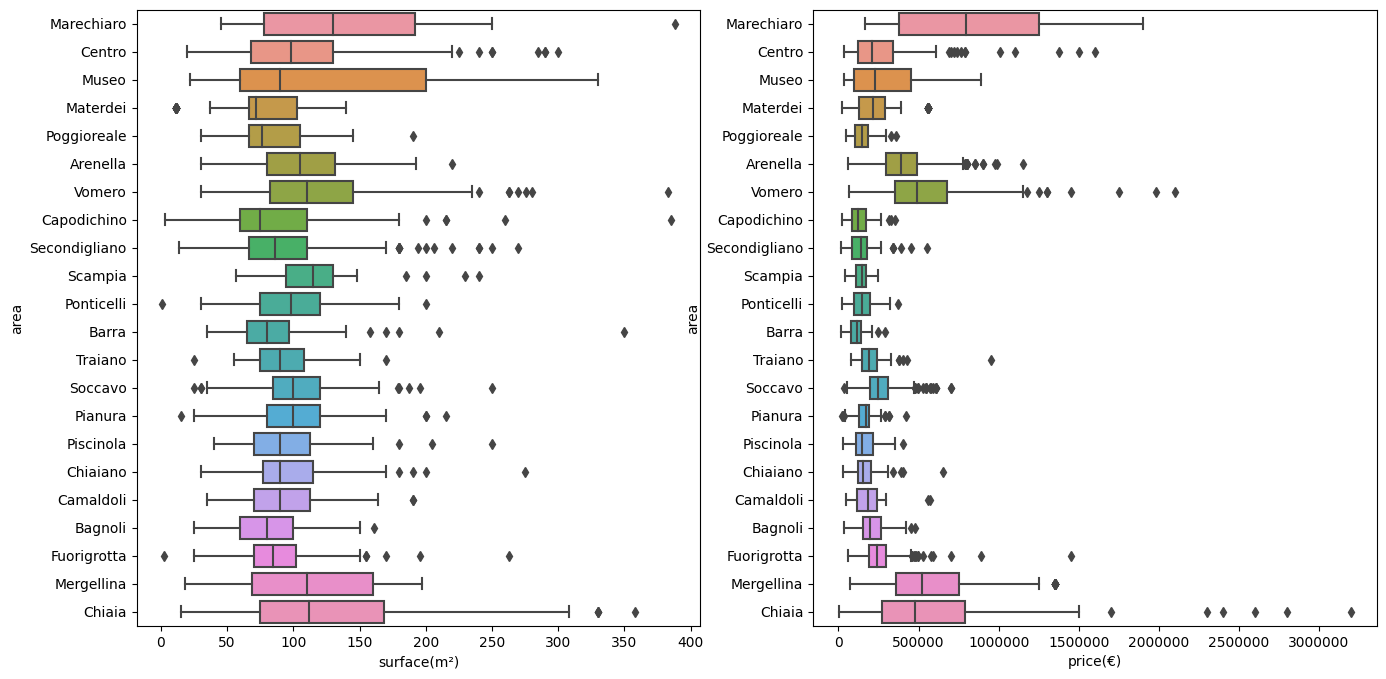

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(y='area', x='surface(m²)', data=df_immobiliare, ax=axs[0])
sns.boxplot(y='area', x='price(€)', data=df_immobiliare, ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='x')
plt.show()

In [35]:
df_immobiliare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3203 non-null   object 
 1   city         3203 non-null   object 
 2   area         3203 non-null   object 
 3   price(€)     3203 non-null   int32  
 4   surface(m²)  3203 non-null   int32  
 5   floor        3203 non-null   float64
 6   rooms        3203 non-null   int32  
 7   bathrooms    3203 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 150.3+ KB


#### Best areas for €/m² ratio

Ranking areas by price

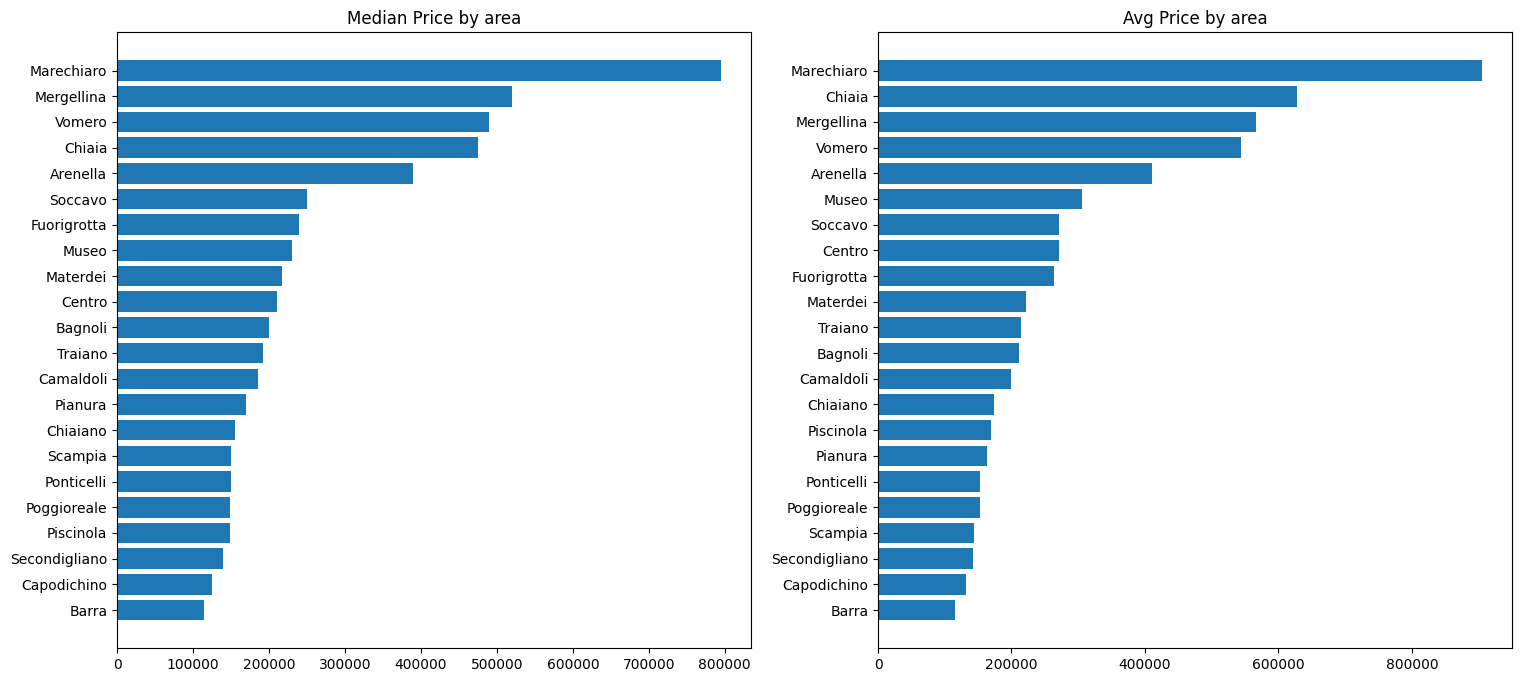

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].barh('area', 'price(€)', data=df_immobiliare.groupby('area', as_index=False)['price(€)'].median().sort_values(by='price(€)', ascending=True))
axs[0].set_title('Median Price by area')
axs[1].barh('area', 'price(€)', data=df_immobiliare.groupby('area', as_index=False)['price(€)'].mean().sort_values(by='price(€)', ascending=True))
axs[1].set_title('Avg Price by area')
plt.show()

Ranking areas by surface

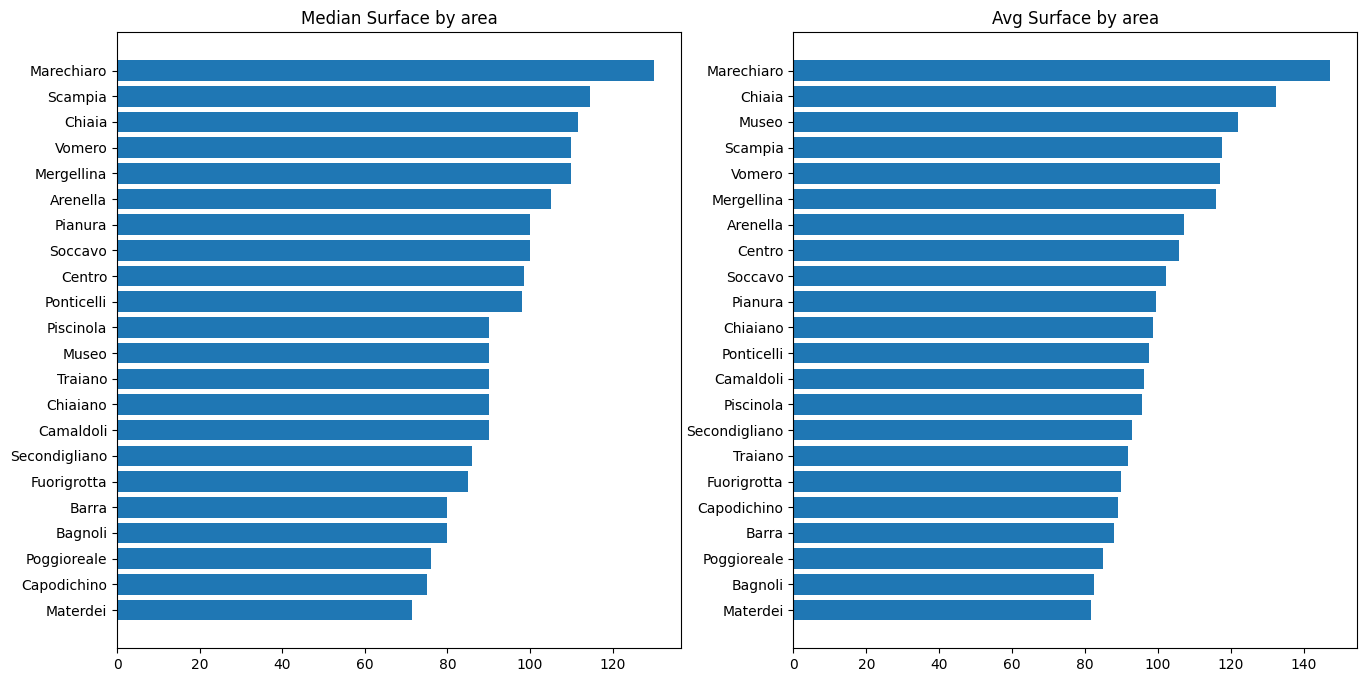

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].barh('area', 'surface(m²)', data=df_immobiliare.groupby('area', as_index=False)['surface(m²)'].median().sort_values(by='surface(m²)', ascending=True))
axs[0].set_title('Median Surface by area')
axs[1].barh('area', 'surface(m²)', data=df_immobiliare.groupby('area', as_index=False)['surface(m²)'].mean().sort_values(by='surface(m²)', ascending=True))
axs[1].set_title('Avg Surface by area')
plt.show()

Ranking areas for €/m² ratio

In [38]:
df_immobiliare['ratio €/m²'] = df_immobiliare['price(€)']/df_immobiliare['surface(m²)']

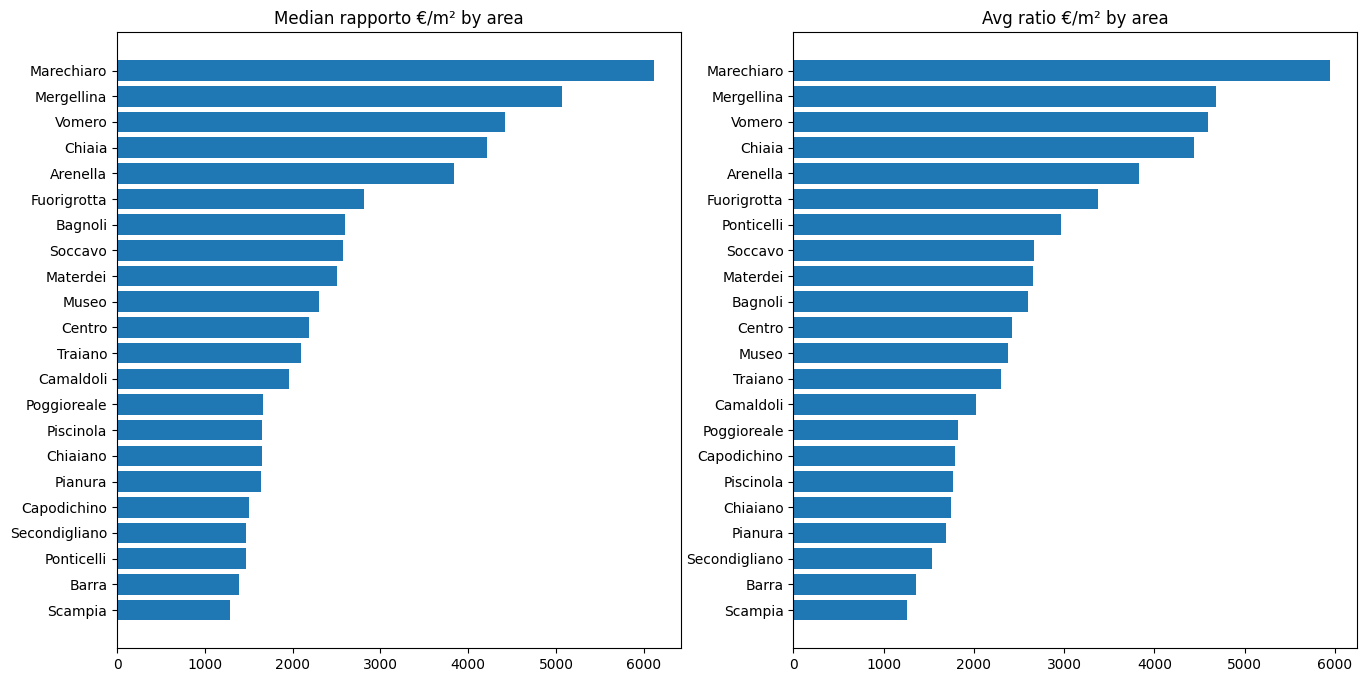

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].barh('area', 'ratio €/m²', data=df_immobiliare.groupby('area', as_index=False)['ratio €/m²'].median().sort_values(by='ratio €/m²', ascending=True))
axs[0].set_title('Median rapporto €/m² by area')
axs[1].barh('area', 'ratio €/m²', data=df_immobiliare.groupby('area', as_index=False)['ratio €/m²'].mean().sort_values(by='ratio €/m²', ascending=True))
axs[1].set_title('Avg ratio €/m² by area')
plt.show()

## LINEAR REGRESSION MODEL

### CORRELECTION ANALYSIS

A strong correlation of price with surface area can be seen. The latter is in turn closely correlated with the number of rooms and bathrooms, as can be expected.
While the floor does not seem to affect the price as much as the surface area.

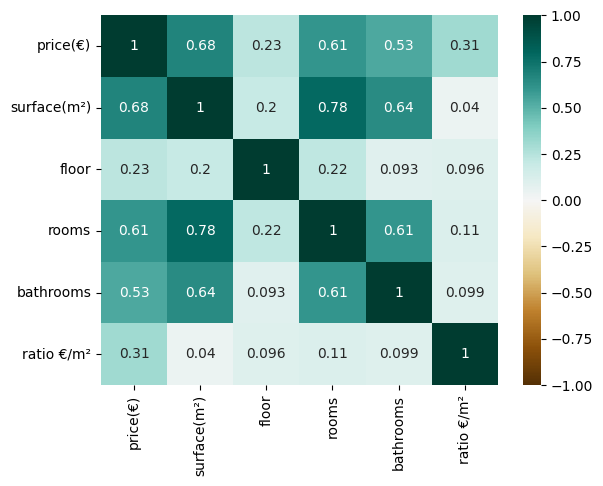

In [40]:
sns.heatmap(df_immobiliare[df_immobiliare.columns[3:]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

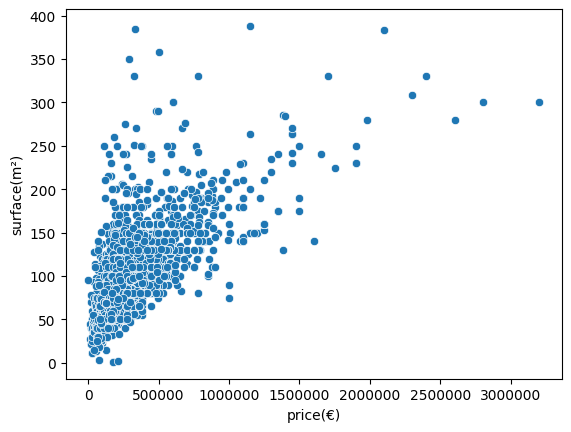

In [41]:
sns.scatterplot(data=df_immobiliare, x='price(€)', y='surface(m²)')
plt.ticklabel_format(style='plain', axis='x')

By inserting the regression line in the chart, it can be seen that its slope is influenced by properties with a price higher than 1 million euros, which appear to be a minority. Observing the distribution of the €/m² ratio median, I decide to divide the df into 3 groups by creating a "Prestige" variable with the following characteristics:
- Median €/m² from 0 to 2000 --> low
- Median €/m² from 2001 to 4000 --> medium
- Median €/m² from 4001 --> high

Therefore, it will be necessary to continue the analysis considering the "Prestige" group to which the zones belong.

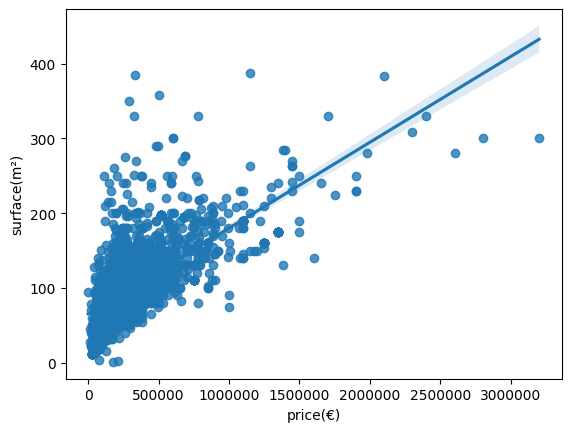

In [42]:
sns.regplot(data=df_immobiliare, x='price(€)', y='surface(m²)')
plt.ticklabel_format(style='plain', axis='x')

In [43]:
print('Houses with price higer then 1 mln euros: n.'+ str(df_immobiliare[df_immobiliare['price(€)']>1000000]['price(€)'].count()))
print('Houses with price lower then 1 mln euros: n.'+ str(df_immobiliare[df_immobiliare['price(€)']<=1000000]['price(€)'].count()))

Houses with price higer then 1 mln euros: n.97
Houses with price lower then 1 mln euros: n.3106


In [44]:
# create a df where for each area calculate the median of the €/m² ratio on the basis of which I assign the 'prestige' variable
df_median_prezzo_metroq = df_immobiliare.groupby('area', as_index=False)['ratio €/m²'].median().sort_values(by='ratio €/m²', ascending=True)
df_median_prezzo_metroq['prestige'] = df_median_prezzo_metroq['ratio €/m²'].apply(lambda x: 'low' if x <= 2000 else ('medium' if x <= 4000 else 'high'))
df_median_prezzo_metroq

,area,ratio €/m²,prestige
17,Scampia,1288.690476,low
2,Barra,1388.888889,low
16,Ponticelli,1469.565217,low
18,Secondigliano,1471.405229,low
4,Capodichino,1500.000000,low
13,Pianura,1636.363636,low
7,Chiaiano,1647.058824,low
14,Piscinola,1648.728814,low
15,Poggioreale,1666.666667,low
3,Camaldoli,1958.333333,low


In [45]:
# add the'prestige' variable to df_immobilare
df_immobiliare = df_immobiliare.merge(df_median_prezzo_metroq[['area', 'prestige']], how='left', left_on='area', right_on='area')

In [46]:
df_immobiliare

,title,city,area,price(€),surface(m²),floor,rooms,bathrooms,ratio €/m²,prestige
0,"Appartamento via Marechiaro 24, Marechiaro, Na...",napoli,Marechiaro,880000,192,0.0,5,2,4583.333333,high
1,"Attico discesa Gaiola 7, Marechiaro, Napoli",napoli,Marechiaro,1900000,230,2.0,6,3,8260.869565,high
2,"Bilocale via Alfano a Marechiaro, Marechiaro, ...",napoli,Marechiaro,210000,45,0.0,2,1,4666.666667,high
3,"Quadrilocale via Marechiaro 75, Marechiaro, Na...",napoli,Marechiaro,650000,100,2.0,4,2,6500.000000,high
4,"Bilocale via Franco Alfano 13, Marechiaro, Napoli",napoli,Marechiaro,350000,90,0.0,2,1,3888.888889,high
...,...,...,...,...,...,...,...,...,...,...
3198,"Attico via Giosuè Carducci 1, Chiaia, Napoli",napoli,Chiaia,1000000,75,9.0,6,4,13333.333333,high
3199,"Trilocale via Ferdinando Palasciano 11, Chiaia...",napoli,Chiaia,360000,100,0.1,3,2,3600.000000,high
3200,"Quadrilocale corso Vittorio Emanuele 608, Chia...",napoli,Chiaia,1200,95,5.0,4,3,12.631579,high
3201,Appartamento piazzetta San Carlo alle Mortelle...,napoli,Chiaia,590000,160,2.0,6,1,3687.500000,high


In [47]:
# check the number of each 'prestige' group
df_immobiliare['prestige'].value_counts()

prestige
medium    1606
low        897
high       700
Name: count, dtype: int64

### LINEAR REGRESSION

We predict the price of an apartment based on the value of the surface for each 'prestige' group of areas in the city

In [48]:
import statsmodels.api as sm

# define the model for low prestige areas
Y_l = df_immobiliare[df_immobiliare['prestige']=='low']['price(€)']
X_l = df_immobiliare[df_immobiliare['prestige']=='low']['surface(m²)']
X_l = sm.add_constant(X_l)
model = sm.OLS(Y_l,X_l)
results_low = model.fit()

# define the model for medium prestige areas
Y_m = df_immobiliare[df_immobiliare['prestige']=='medium']['price(€)']
X_m = df_immobiliare[df_immobiliare['prestige']=='medium']['surface(m²)']
X_m = sm.add_constant(X_m)
model = sm.OLS(Y_m,X_m)
results_medium = model.fit()

# define the model for high prestige areas
Y_h = df_immobiliare[df_immobiliare['prestige']=='high']['price(€)']
X_h = df_immobiliare[df_immobiliare['prestige']=='high']['surface(m²)']
X_h = sm.add_constant(X_h)
model = sm.OLS(Y_h,X_h)
results_high = model.fit()

In [49]:
# price forecast low prestige areas
list_prices_l = []
list_sq_meters = [ 50, 60 , 70 , 80, 90, 100, 110, 120]
for c in list_sq_meters:
    list_prices_l.append(str(round(results_low.predict(np.array([1, c]))[0],2)))

df_pred_price = pd.DataFrame({'metriq': list_sq_meters, 'price_pred_low_area': list_prices_l})

# price forecast medium prestige areas
list_prices_m = []
for c in list_sq_meters:
    list_prices_m.append(str(round(results_medium.predict(np.array([1, c]))[0],2)))

# price forecast high prestige areas
list_prices_h = []
for c in list_sq_meters:
    list_prices_h.append(str(round(results_high.predict(np.array([1, c]))[0],2)))

df_pred_price['price_pred_medium_area'] = list_prices_m
df_pred_price['price_pred_high_area'] = list_prices_h
df_pred_price

,metriq,price_pred_low_area,price_pred_medium_area,price_pred_high_area
0,50,94201.4,134329.28,206842.01
1,60,106687.45,164850.43,260326.59
2,70,119173.5,195371.57,313811.17
3,80,131659.55,225892.72,367295.74
4,90,144145.59,256413.87,420780.32
5,100,156631.64,286935.01,474264.89
6,110,169117.69,317456.16,527749.47
7,120,181603.74,347977.31,581234.05
